## **Fase 5 - Preprocesamiento para Machine Learning**

En esta fase nos centramos en la preparación de los datos para el entrenamiento de los modelos de Machine Learning. El preprocesamiento es una de las etapas más importantes en cualquier proyecto de Data Science, ya que la calidad de los datos de entrada puede determinar el rendimiento y la efectividad del modelo final.

Las principales tareas de preprocesamiento que llevamos a cabo incluyen:

1. **Manejo de valores nulos:** Hemos utilizado el KNN Imputer para tratar los valores nulos en el dataset, asegurándonos de que no haya datos faltantes que puedan afectar el modelo.
  
2. **Codificación de variables categóricas:** Implementamos One Hot Encoding para convertir las variables categóricas en representaciones numéricas, de forma que los modelos puedan trabajar con ellas de manera eficiente.


3. **Eliminación de variables irrelevantes:** Algunas variables que no aportan valor al modelo o que podrían ser redundantes han sido eliminadas del conjunto de datos.

El resultado de esta fase es un conjunto de datos limpio y listo para ser utilizado en el entrenamiento de los modelos de Machine Learning.


In [ ]:
# General
import numpy as np
import pandas as pd
import pickle

# Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Importance
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/df_final_cleaned.csv')

In [3]:
df

,urls,timestamp,record_id,titles,host_name,property_types,prices_per_night,location,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,total_hours_checkin
0,https://www.airbnb.es/rooms/126311759129279497...,2024-11-07 23:54:16,1263117591292794971,"La ubicación muy buena, cerca de todo si estás...",Carmen,Alojamiento entero,115.0,"Barcelona, Catalunya, España",0.00,0.0,0.0,1.0,1.0,1.0,NaN,15:00,12:00,9.0
1,https://www.airbnb.es/rooms/127904085557632410...,2024-11-07 23:54:16,1279040855576324107,Este anfitrión tiene 979 evaluaciones de otros...,David,Habitación,46.0,"Barcelona, Catalunya, España",0.00,0.0,15.0,1.0,1.0,0.5,1.0,17:00,11:00,7.0
2,https://www.airbnb.es/rooms/913187918206344111...,2024-11-07 23:54:16,913187918206344111,Esta acogedora habitación cuenta con una cómod...,Manuel,Habitación,47.0,NaN,4.66,65.0,0.0,1.0,1.0,0.5,1.0,15:00,12:00,9.0
3,https://www.airbnb.es/rooms/126566083301808951...,2024-11-07 23:54:16,1265660833018089515,Instalaciones y servicios nuevos a estrenar.es...,BLAU Student Housing,Alojamiento entero,100.0,"Barcelona, Catalunya, España",4.89,0.0,35.0,1.0,1.0,1.0,1.0,16:00,12:00,8.0
4,https://www.airbnb.es/rooms/31977850?adults=1&...,2024-11-07 23:54:16,31977850,hay una razón por la que hemos sido votados co...,St Christophers Barcelona,Habitación,33.0,"Barcelona, España",4.40,990.0,0.0,1.0,1.0,0.5,1.0,15:00,11:00,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,https://www.airbnb.es/rooms/13151223?adults=1&...,2024-11-07 23:54:16,13151223,Una habitación muy tranquila para 2-3 personas...,Mike,Habitación,55.0,NaN,4.74,197.0,10.0,1.0,1.0,0.5,3.0,15:00,11:00,9.0
2522,https://www.airbnb.es/rooms/109718701780399279...,2024-11-07 23:54:16,1097187017803992791,Olvídate de las preocupaciones en este alojami...,Beverly,Habitación,60.0,"Barcelona, Catalunya, España",4.78,59.0,0.0,1.0,1.0,0.5,2.0,15:00,10:00,9.0
2523,https://www.airbnb.es/rooms/20975351?adults=1&...,2024-11-07 23:54:16,20975351,"Piso tipo dúplex de obra nueva, muy luminoso, ...",Aylén,Alojamiento entero,104.0,NaN,4.96,0.0,0.0,2.0,3.0,2.0,4.0,15:00,12:00,9.0
2524,https://www.airbnb.es/rooms/52528580?adults=1&...,2024-11-07 23:54:16,52528580,Precioso estudio muy cerca de la playa muy tra...,Gustavo,Alojamiento entero,120.0,NaN,4.83,136.0,50.0,1.0,1.0,1.0,2.0,15:00,11:00,9.0


#### Manejo de NaN's

In [4]:
df.isna().sum()

urls                      0
timestamp                 0
record_id                 0
titles                    1
host_name                 1
property_types            0
prices_per_night          0
location               1245
ratings                   0
num_reviews               0
cleaning_fee             74
dormitorios              36
camas                   103
baños                    65
maximum_guests            2
check_in_hour           192
check_out_hour          192
total_hours_checkin     192
dtype: int64

#### Normalización de Columnas Numéricas Continuas

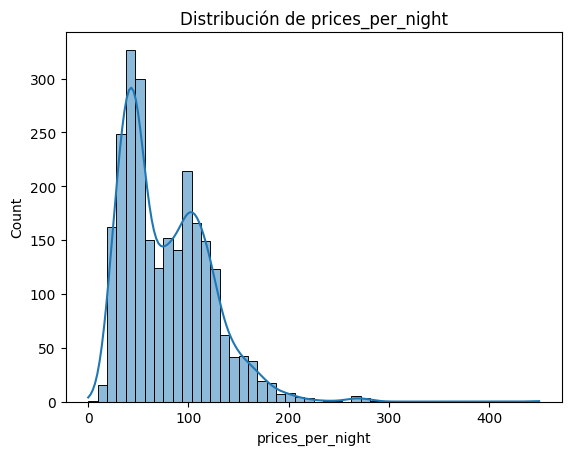

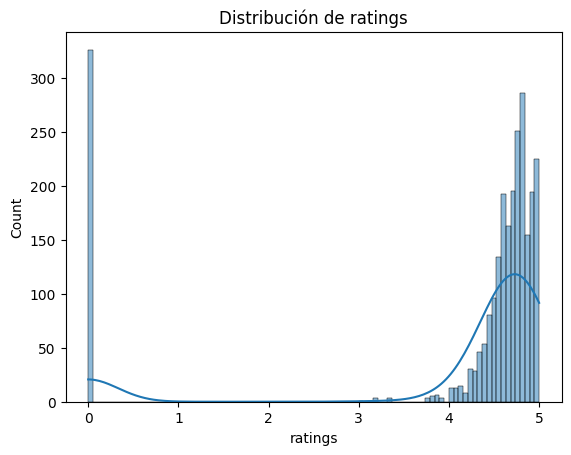

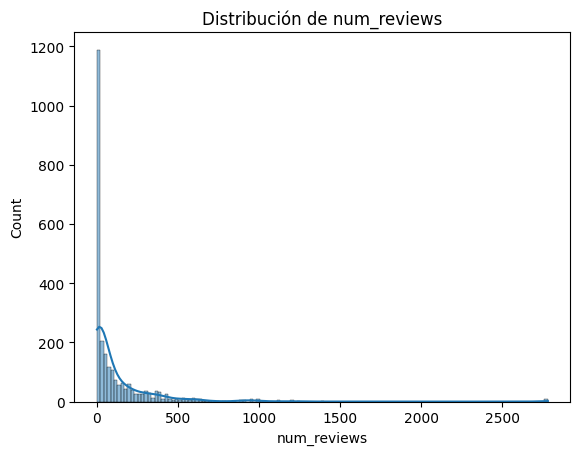

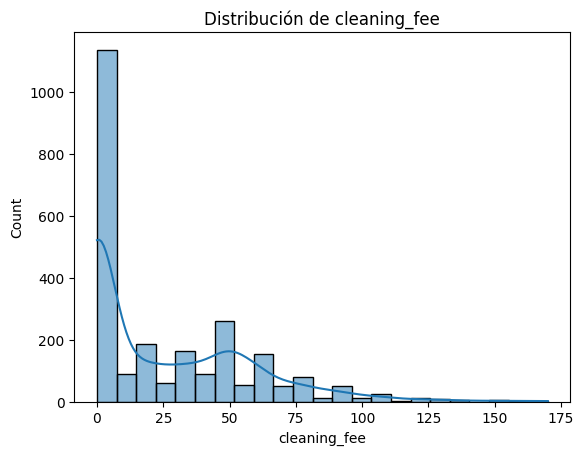

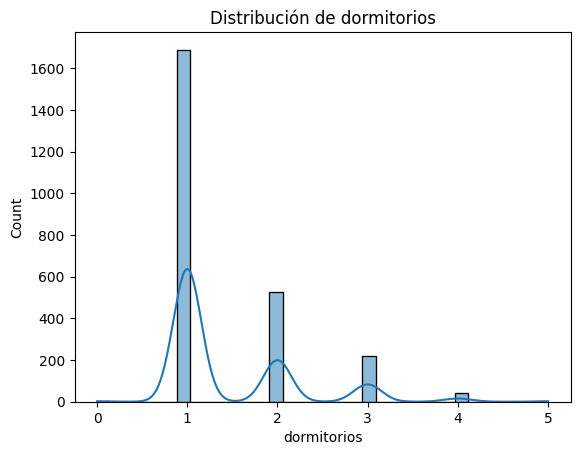

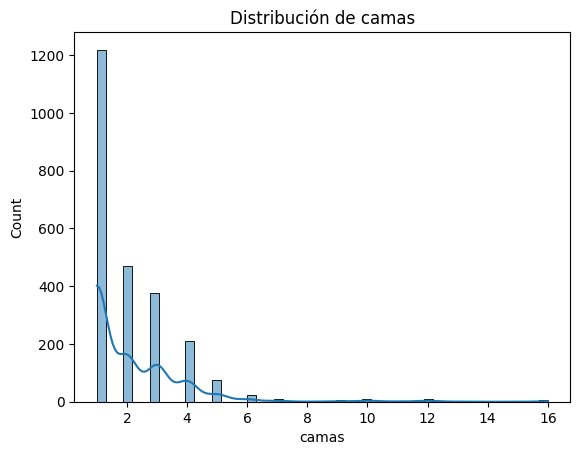

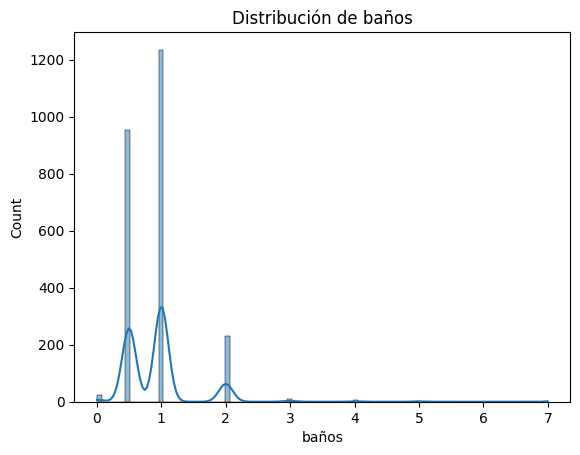

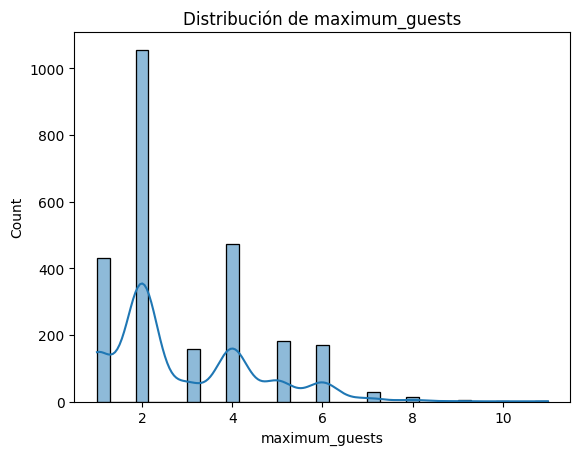

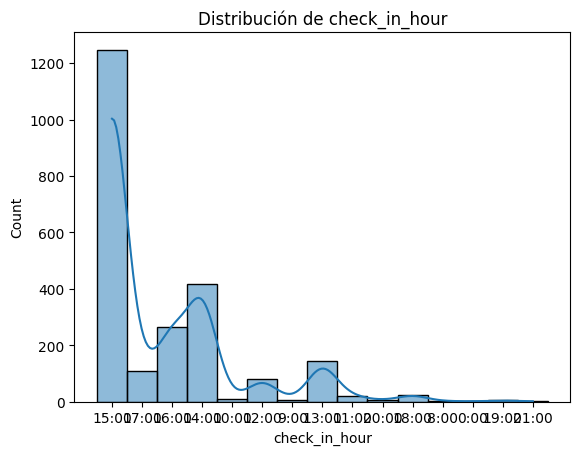

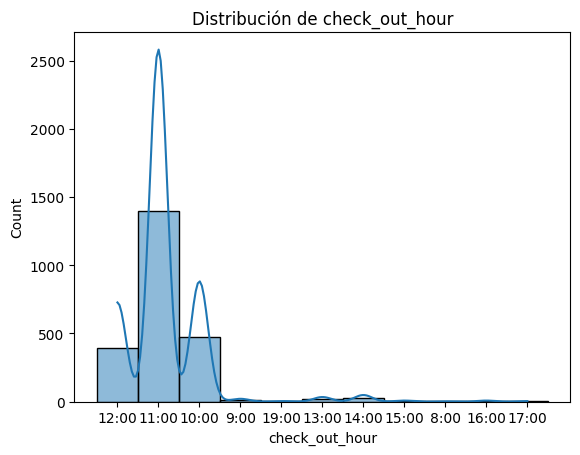

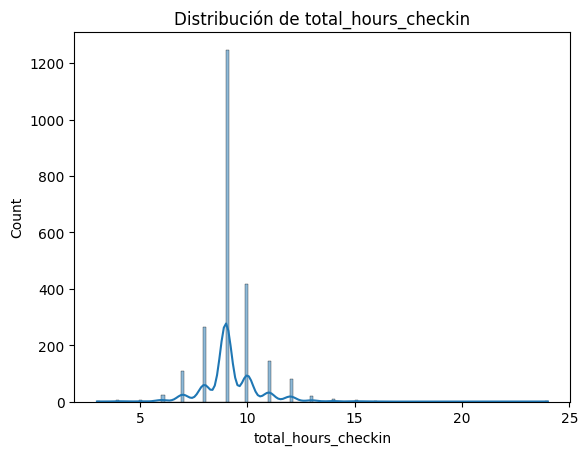

In [5]:
numeric_columns = ['prices_per_night', 'ratings', 'num_reviews', 'cleaning_fee', 
                   'dormitorios', 'camas', 'baños', 'maximum_guests', 
                   'check_in_hour', 'check_out_hour', 'total_hours_checkin']

for col in numeric_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

In [6]:
df['log_num_reviews'] = np.log1p(df['num_reviews'])

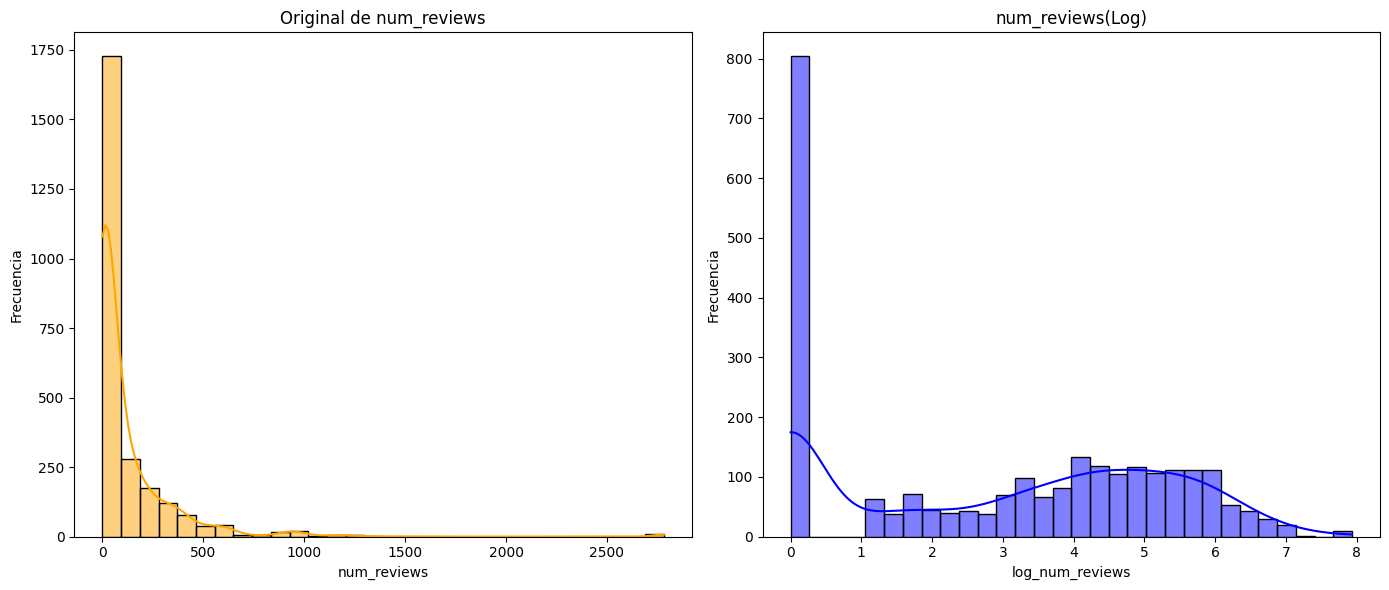

In [7]:
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df['num_reviews'], kde=True, bins=30, color='orange')
plt.title('Original de num_reviews')
plt.xlabel('num_reviews')
plt.ylabel('Frecuencia')

# Log
plt.subplot(1, 2, 2)
sns.histplot(df['log_num_reviews'], kde=True, bins=30, color='blue')
plt.title('num_reviews(Log)')
plt.xlabel('log_num_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
df = df.drop('num_reviews', axis=1)

In [9]:
df

,urls,timestamp,record_id,titles,host_name,property_types,prices_per_night,location,ratings,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,total_hours_checkin,log_num_reviews
0,https://www.airbnb.es/rooms/126311759129279497...,2024-11-07 23:54:16,1263117591292794971,"La ubicación muy buena, cerca de todo si estás...",Carmen,Alojamiento entero,115.0,"Barcelona, Catalunya, España",0.00,0.0,1.0,1.0,1.0,NaN,15:00,12:00,9.0,0.000000
1,https://www.airbnb.es/rooms/127904085557632410...,2024-11-07 23:54:16,1279040855576324107,Este anfitrión tiene 979 evaluaciones de otros...,David,Habitación,46.0,"Barcelona, Catalunya, España",0.00,15.0,1.0,1.0,0.5,1.0,17:00,11:00,7.0,0.000000
2,https://www.airbnb.es/rooms/913187918206344111...,2024-11-07 23:54:16,913187918206344111,Esta acogedora habitación cuenta con una cómod...,Manuel,Habitación,47.0,NaN,4.66,0.0,1.0,1.0,0.5,1.0,15:00,12:00,9.0,4.189655
3,https://www.airbnb.es/rooms/126566083301808951...,2024-11-07 23:54:16,1265660833018089515,Instalaciones y servicios nuevos a estrenar.es...,BLAU Student Housing,Alojamiento entero,100.0,"Barcelona, Catalunya, España",4.89,35.0,1.0,1.0,1.0,1.0,16:00,12:00,8.0,0.000000
4,https://www.airbnb.es/rooms/31977850?adults=1&...,2024-11-07 23:54:16,31977850,hay una razón por la que hemos sido votados co...,St Christophers Barcelona,Habitación,33.0,"Barcelona, España",4.40,0.0,1.0,1.0,0.5,1.0,15:00,11:00,9.0,6.898715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,https://www.airbnb.es/rooms/13151223?adults=1&...,2024-11-07 23:54:16,13151223,Una habitación muy tranquila para 2-3 personas...,Mike,Habitación,55.0,NaN,4.74,10.0,1.0,1.0,0.5,3.0,15:00,11:00,9.0,5.288267
2522,https://www.airbnb.es/rooms/109718701780399279...,2024-11-07 23:54:16,1097187017803992791,Olvídate de las preocupaciones en este alojami...,Beverly,Habitación,60.0,"Barcelona, Catalunya, España",4.78,0.0,1.0,1.0,0.5,2.0,15:00,10:00,9.0,4.094345
2523,https://www.airbnb.es/rooms/20975351?adults=1&...,2024-11-07 23:54:16,20975351,"Piso tipo dúplex de obra nueva, muy luminoso, ...",Aylén,Alojamiento entero,104.0,NaN,4.96,0.0,2.0,3.0,2.0,4.0,15:00,12:00,9.0,0.000000
2524,https://www.airbnb.es/rooms/52528580?adults=1&...,2024-11-07 23:54:16,52528580,Precioso estudio muy cerca de la playa muy tra...,Gustavo,Alojamiento entero,120.0,NaN,4.83,50.0,1.0,1.0,1.0,2.0,15:00,11:00,9.0,4.919981


In [10]:
with open('data/df_final_cleaned_transform.pkl', 'wb') as f:
    pickle.dump(df, f)

#### Preparación del dataframe para hacer encoders

In [11]:
with open('data/df_final_cleaned_transform.pkl', 'rb') as f:
    df1 = pickle.load(f)
df2 = pd.read_csv('data/df_servicios_final_cleaned.csv')

In [12]:
# Hacemos merge del df de la habitacion con el de servicios
df3 = pd.merge(left = df1, right = df2,how = 'inner',on = "urls")

In [13]:
# Preparamos el df con las variables a analizar
df_services_merged = df3[['urls','prices_per_night','category','services']]

In [14]:
df_table = df_services_merged.groupby(by = ["urls", "category"], as_index = False).agg({"services" : "count"})
df_table

,urls,category,services
0,https://www.airbnb.es/rooms/100044781045691589...,aparcamiento e instalaciones,1
1,https://www.airbnb.es/rooms/100044781045691589...,baño,5
2,https://www.airbnb.es/rooms/100044781045691589...,calefacción y refrigeración,2
3,https://www.airbnb.es/rooms/100044781045691589...,cocina y comedor,13
4,https://www.airbnb.es/rooms/100044781045691589...,dormitorio y lavandería,8
...,...,...,...
21871,https://www.airbnb.es/rooms/999334336680170645...,dormitorio y lavandería,8
21872,https://www.airbnb.es/rooms/999334336680170645...,entretenimiento,2
21873,https://www.airbnb.es/rooms/999334336680170645...,internet y oficina,2
21874,https://www.airbnb.es/rooms/999334336680170645...,seguridad en el hogar,2


In [15]:
# Crear una tabla pivote con categorías como columnas y el número de servicios en cada categoría
df_servicios_pivot = df_table.pivot_table(
    index='urls',         
    columns='category', 
    values='services',   
    aggfunc='sum',
    fill_value=0 
).reset_index()

In [16]:
df_servicios_pivot

category,urls,aparcamiento e instalaciones,baño,calefacción y refrigeración,características de la ubicación,cocina y comedor,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios
0,https://www.airbnb.es/rooms/100044781045691589...,1,5,2,0,13,8,1,0,2,1,0,0,0
1,https://www.airbnb.es/rooms/100051458827470719...,0,2,0,0,2,2,0,0,2,0,1,0,2
2,https://www.airbnb.es/rooms/100114773709033483...,1,5,4,0,13,6,2,1,2,2,0,3,2
3,https://www.airbnb.es/rooms/10038461?adults=1&...,1,2,2,3,9,6,1,2,2,0,0,0,2
4,https://www.airbnb.es/rooms/100569042845880747...,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,https://www.airbnb.es/rooms/998945864657673961...,2,3,3,1,7,5,1,1,1,0,0,2,1
2493,https://www.airbnb.es/rooms/999180200821552889...,1,6,2,0,14,8,1,1,2,0,2,0,4
2494,https://www.airbnb.es/rooms/999188656384515552...,0,5,0,0,10,10,0,0,2,0,4,0,3
2495,https://www.airbnb.es/rooms/999287710180353527...,1,7,1,0,10,8,0,1,2,0,1,0,2


In [17]:
# Hacemos merge del df de la habitacion con el de servicios
df_to_encode = pd.merge(left = df1, right = df_servicios_pivot,how = 'inner',on = "urls")
df_to_encode

,urls,timestamp,record_id,titles,host_name,property_types,prices_per_night,location,ratings,cleaning_fee,...,características de la ubicación,cocina y comedor,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios
0,https://www.airbnb.es/rooms/126311759129279497...,2024-11-07 23:54:16,1263117591292794971,"La ubicación muy buena, cerca de todo si estás...",Carmen,Alojamiento entero,115.0,"Barcelona, Catalunya, España",0.00,0.0,...,2,6,7,1,2,1,0,0,1,4
1,https://www.airbnb.es/rooms/127904085557632410...,2024-11-07 23:54:16,1279040855576324107,Este anfitrión tiene 979 evaluaciones de otros...,David,Habitación,46.0,"Barcelona, Catalunya, España",0.00,15.0,...,0,10,6,0,0,2,0,2,0,1
2,https://www.airbnb.es/rooms/913187918206344111...,2024-11-07 23:54:16,913187918206344111,Esta acogedora habitación cuenta con una cómod...,Manuel,Habitación,47.0,NaN,4.66,0.0,...,2,11,8,1,1,1,0,1,0,5
3,https://www.airbnb.es/rooms/126566083301808951...,2024-11-07 23:54:16,1265660833018089515,Instalaciones y servicios nuevos a estrenar.es...,BLAU Student Housing,Alojamiento entero,100.0,"Barcelona, Catalunya, España",4.89,35.0,...,1,10,10,10,3,2,2,0,5,4
4,https://www.airbnb.es/rooms/31977850?adults=1&...,2024-11-07 23:54:16,31977850,hay una razón por la que hemos sido votados co...,St Christophers Barcelona,Habitación,33.0,"Barcelona, España",4.40,0.0,...,0,3,4,0,1,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,https://www.airbnb.es/rooms/13151223?adults=1&...,2024-11-07 23:54:16,13151223,Una habitación muy tranquila para 2-3 personas...,Mike,Habitación,55.0,NaN,4.74,10.0,...,0,8,7,1,0,2,0,3,0,1
2493,https://www.airbnb.es/rooms/109718701780399279...,2024-11-07 23:54:16,1097187017803992791,Olvídate de las preocupaciones en este alojami...,Beverly,Habitación,60.0,"Barcelona, Catalunya, España",4.78,0.0,...,0,8,4,1,0,1,0,1,0,1
2494,https://www.airbnb.es/rooms/20975351?adults=1&...,2024-11-07 23:54:16,20975351,"Piso tipo dúplex de obra nueva, muy luminoso, ...",Aylén,Alojamiento entero,104.0,NaN,4.96,0.0,...,3,16,9,1,0,2,0,0,2,3
2495,https://www.airbnb.es/rooms/52528580?adults=1&...,2024-11-07 23:54:16,52528580,Precioso estudio muy cerca de la playa muy tra...,Gustavo,Alojamiento entero,120.0,NaN,4.83,50.0,...,4,13,8,3,3,2,0,0,2,1


#### Convertimos las horas de check-in y check-out a minutos para facilitar el procesamiento y la modelización

In [18]:
# Convertir la columna a formato tiempo
df_to_encode['check_out_hour'] = pd.to_datetime(df_to_encode['check_out_hour'], format='%H:%M')

# Calcular los minutos desde la medianoche
df_to_encode['check_out_hour'] = df_to_encode['check_out_hour'].dt.hour * 60 + df_to_encode['check_out_hour'].dt.minute

In [19]:
# Convertir la columna a formato tiempo
df_to_encode['check_in_hour'] = pd.to_datetime(df_to_encode['check_in_hour'], format='%H:%M')

# Calcular los minutos desde la medianoche
df_to_encode['check_in_hour'] = df_to_encode['check_in_hour'].dt.hour * 60 + df_to_encode['check_in_hour'].dt.minute

In [20]:
df_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   urls                             2497 non-null   object 
 1   timestamp                        2497 non-null   object 
 2   record_id                        2497 non-null   int64  
 3   titles                           2496 non-null   object 
 4   host_name                        2496 non-null   object 
 5   property_types                   2497 non-null   object 
 6   prices_per_night                 2497 non-null   float64
 7   location                         1261 non-null   object 
 8   ratings                          2497 non-null   float64
 9   cleaning_fee                     2426 non-null   float64
 10  dormitorios                      2462 non-null   float64
 11  camas                            2394 non-null   float64
 12  baños               

In [21]:
df_to_encode = df_to_encode.drop(['urls', 'timestamp', 'record_id','titles','host_name','location',], axis=1)

In [22]:
df_to_encode.to_csv('data/df_to_encode.csv', index = False)

#### Codificación de Variables Categóricas

In [23]:
df_encoded = df_to_encode.copy()

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_encoded[['property_types']])
# Verifica el número de características generadas
feature_names = encoder.get_feature_names_out()
print(f'Number of feature names: {len(feature_names)}')
print(f'Number of encoded features: {encoded_features.shape[1]}')

# Crear el DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)  

Number of feature names: 2
Number of encoded features: 2


In [24]:
encoded_df = encoded_df.rename(columns={'property_types_Habitación': 'habitacion'})
encoded_df = encoded_df.rename(columns={'property_types_otro': 'alojamiento entero'})
encoded_df.head()

,habitacion,alojamiento entero
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


In [25]:
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.head()

,property_types,prices_per_night,ratings,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,Alojamiento entero,115.0,0.00,0.0,1.0,1.0,1.0,NaN,900.0,720.0,...,7,1,2,1,0,0,1,4,0.0,0.0
1,Habitación,46.0,0.00,15.0,1.0,1.0,0.5,1.0,1020.0,660.0,...,6,0,0,2,0,2,0,1,1.0,0.0
2,Habitación,47.0,4.66,0.0,1.0,1.0,0.5,1.0,900.0,720.0,...,8,1,1,1,0,1,0,5,1.0,0.0
3,Alojamiento entero,100.0,4.89,35.0,1.0,1.0,1.0,1.0,960.0,720.0,...,10,10,3,2,2,0,5,4,0.0,0.0
4,Habitación,33.0,4.40,0.0,1.0,1.0,0.5,1.0,900.0,660.0,...,4,0,1,1,0,0,3,1,1.0,0.0


In [26]:
df_encoded = df_encoded.drop('property_types',axis= 1)

In [27]:
df_encoded['habitacion'] = df_encoded['habitacion'].astype('int64')
df_encoded['alojamiento entero'] = df_encoded['alojamiento entero'].astype('int64')

In [28]:
with open('data/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

KNN Imputer

In [29]:
%%time
imputer = KNNImputer(n_neighbors=3)
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded

CPU times: total: 156 ms
Wall time: 303 ms


,prices_per_night,ratings,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,total_hours_checkin,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,115.0,0.00,0.0,1.0,1.0,1.0,2.0,900.0,720.0,9.0,...,7.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
1,46.0,0.00,15.0,1.0,1.0,0.5,1.0,1020.0,660.0,7.0,...,6.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
2,47.0,4.66,0.0,1.0,1.0,0.5,1.0,900.0,720.0,9.0,...,8.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
3,100.0,4.89,35.0,1.0,1.0,1.0,1.0,960.0,720.0,8.0,...,10.0,10.0,3.0,2.0,2.0,0.0,5.0,4.0,0.0,0.0
4,33.0,4.40,0.0,1.0,1.0,0.5,1.0,900.0,660.0,9.0,...,4.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,55.0,4.74,10.0,1.0,1.0,0.5,3.0,900.0,660.0,9.0,...,7.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0
2493,60.0,4.78,0.0,1.0,1.0,0.5,2.0,900.0,600.0,9.0,...,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2494,104.0,4.96,0.0,2.0,3.0,2.0,4.0,900.0,720.0,9.0,...,9.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0
2495,120.0,4.83,50.0,1.0,1.0,1.0,2.0,900.0,660.0,9.0,...,8.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0


In [30]:
with open('data/knn_imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

In [31]:
df = df_encoded.copy()

In [32]:
df.isna().sum()

prices_per_night                   0
ratings                            0
cleaning_fee                       0
dormitorios                        0
camas                              0
baños                              0
maximum_guests                     0
check_in_hour                      0
check_out_hour                     0
total_hours_checkin                0
log_num_reviews                    0
aparcamiento e instalaciones       0
baño                               0
calefacción y refrigeración        0
características de la ubicación    0
cocina y comedor                   0
dormitorio y lavandería            0
entretenimiento                    0
exterior                           0
internet y oficina                 0
para familias                      0
privacidad y seguridad             0
seguridad en el hogar              0
servicios                          0
habitacion                         0
alojamiento entero                 0
dtype: int64

In [33]:
df.to_csv('data/df_processed_ML.csv', index = False)

<Axes: >

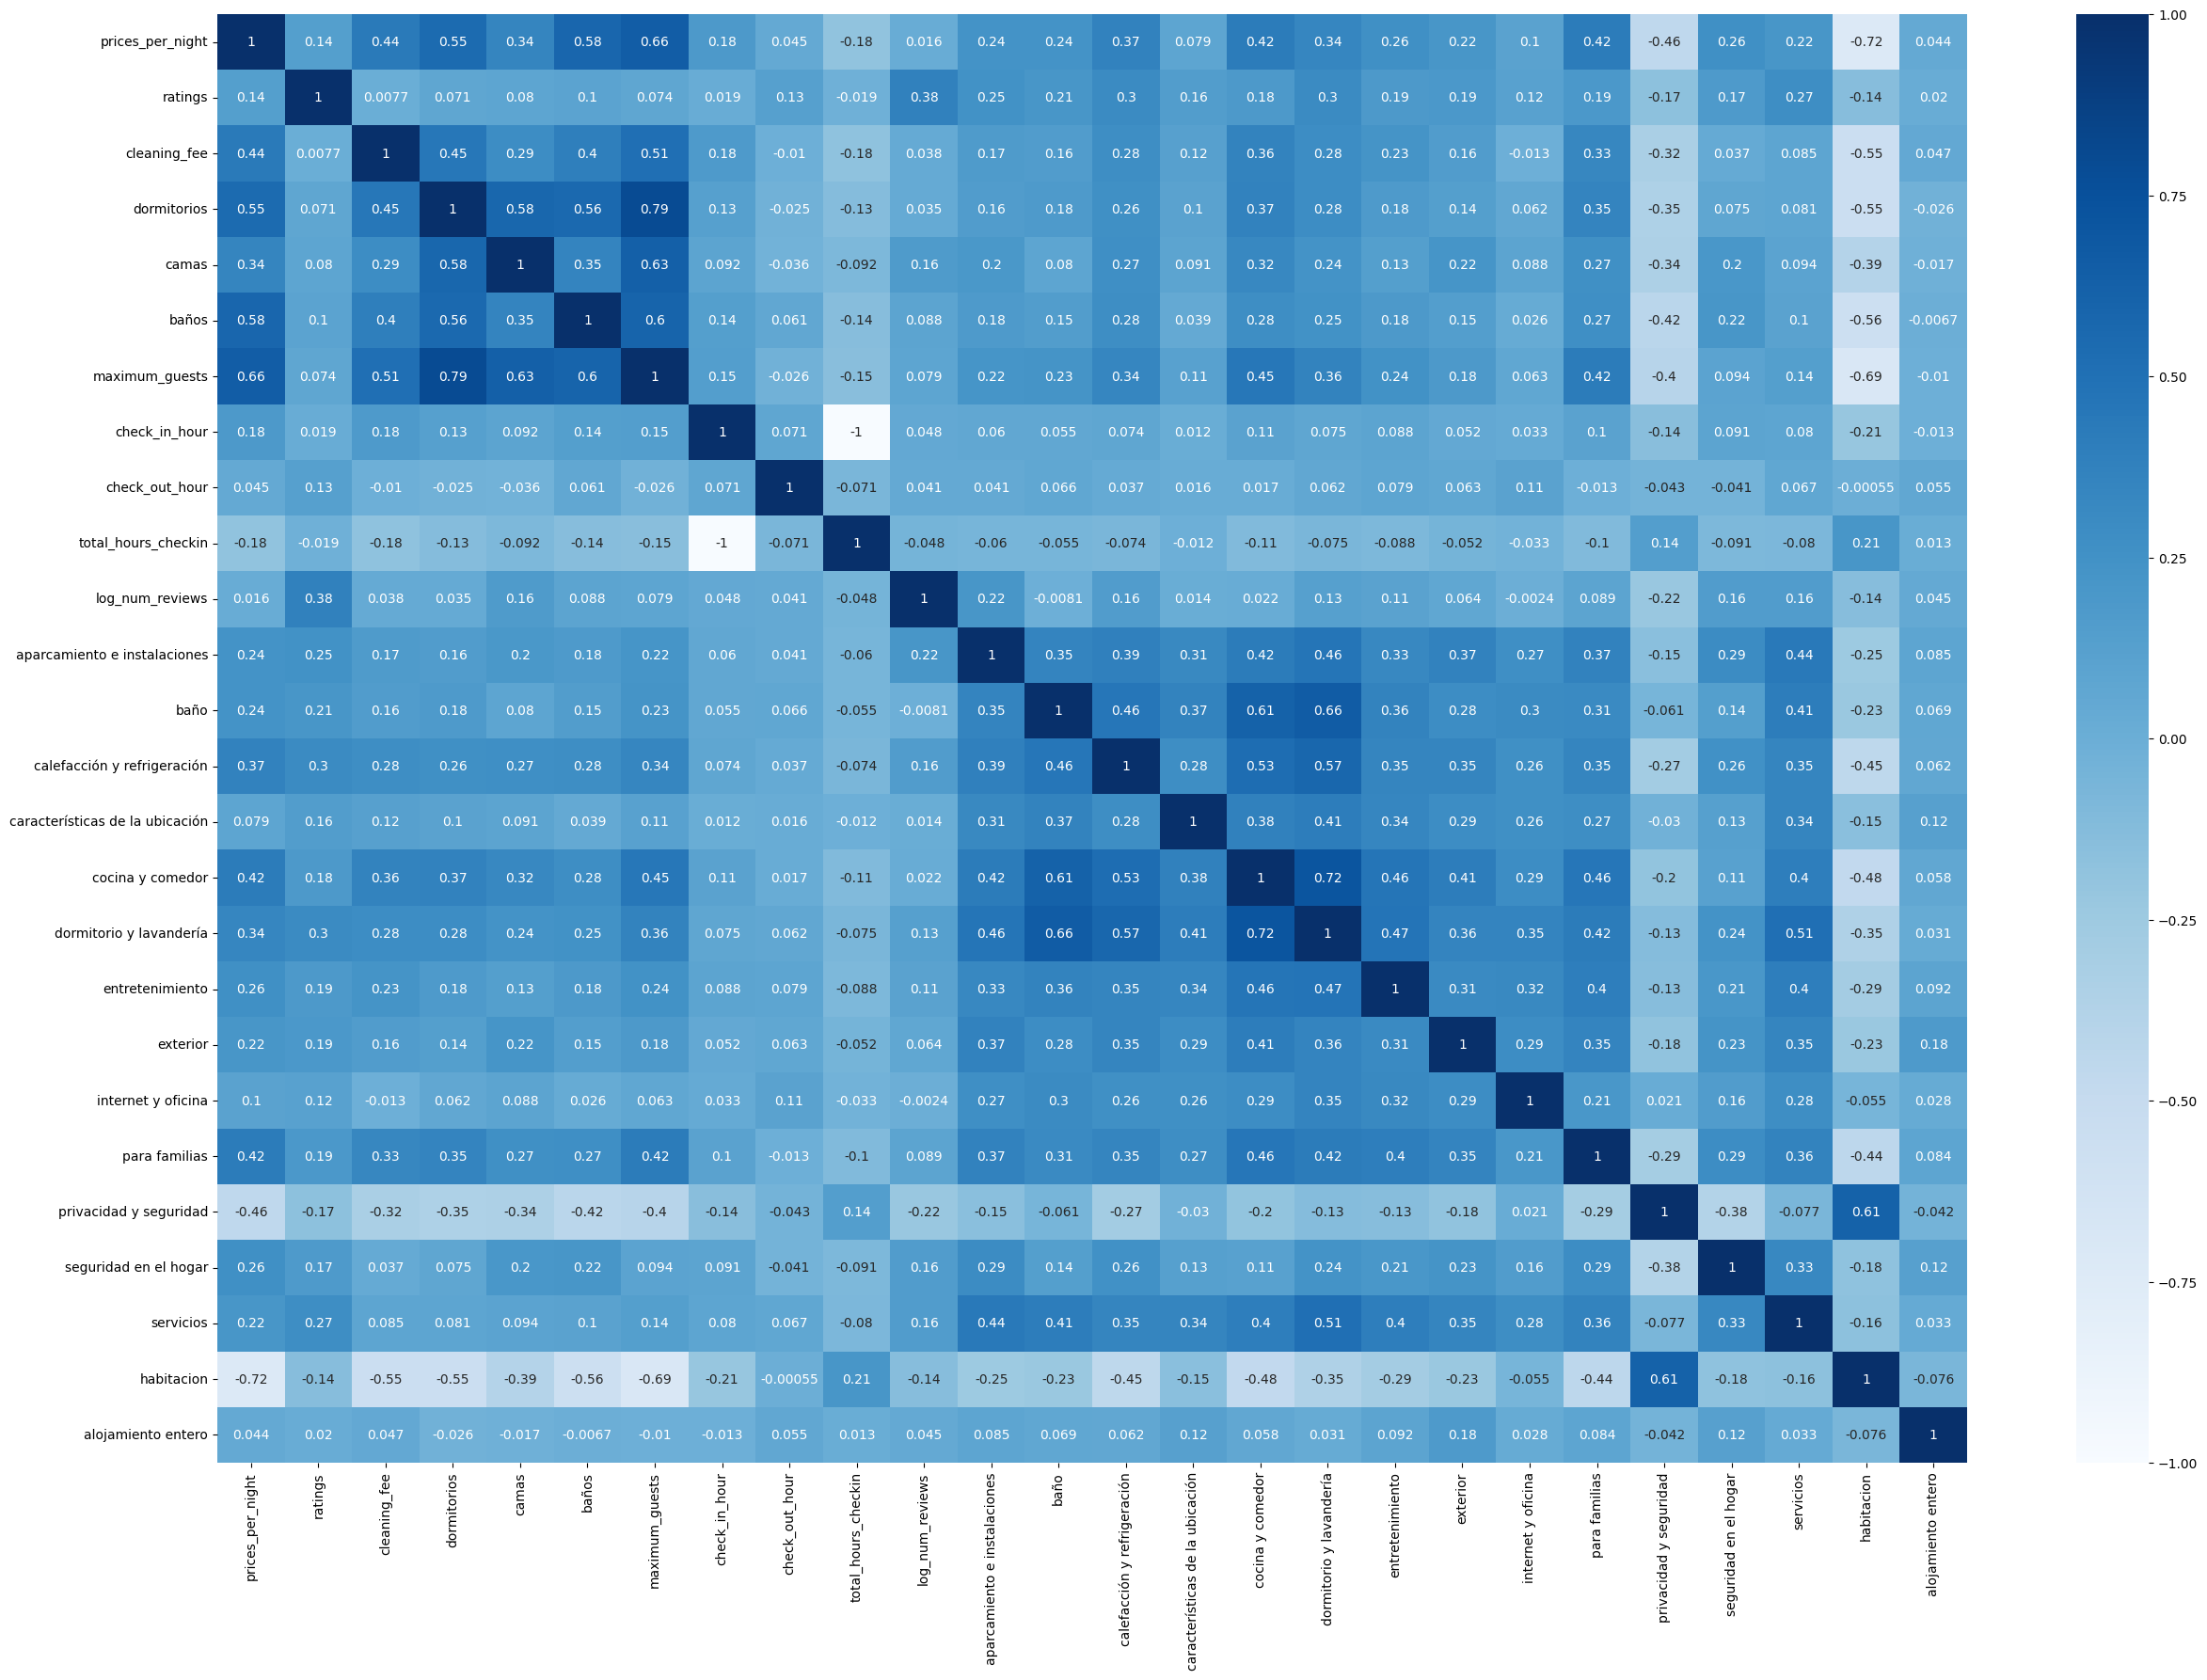

In [34]:
plt.figure(figsize=(30, 20))

sns.heatmap(data = df_encoded.corr(), annot = True,cmap="Blues")

Feature Importance:
 1. feature  0 ( 0.49752379358910637): habitacion
 2. feature  1 ( 0.09839176837463395): baños
 3. feature  2 ( 0.07257247152456553): ratings
 4. feature  3 ( 0.04576032945957031): cleaning_fee
 5. feature  4 (0.033189048313100475): log_num_reviews
 6. feature  5 ( 0.02878679748575137): seguridad en el hogar
 7. feature  6 ( 0.02586792764084362): dormitorio y lavandería
 8. feature  7 (0.021416395834657268): cocina y comedor
 9. feature  8 (  0.0214104524619131): maximum_guests
10. feature  9 (0.019161093084055936): para familias
11. feature 10 (0.013924191667845797): exterior
12. feature 11 (0.013536142134675242): baño
13. feature 12 (0.013469544766963012): servicios
14. feature 13 (0.012227754094248847): aparcamiento e instalaciones
15. feature 14 (0.010571801826679317): características de la ubicación
16. feature 15 (0.009960464449737898): camas
17. feature 16 (0.009804789210626951): dormitorios
18. feature 17 (0.008847767876861536): entretenimiento
19. feature 1

<timed exec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

<timed exec>:26: UserWarning: 
The palette list has fewer values (17) than needed (25) and will cycle, which may produce an uninterpretable plot.


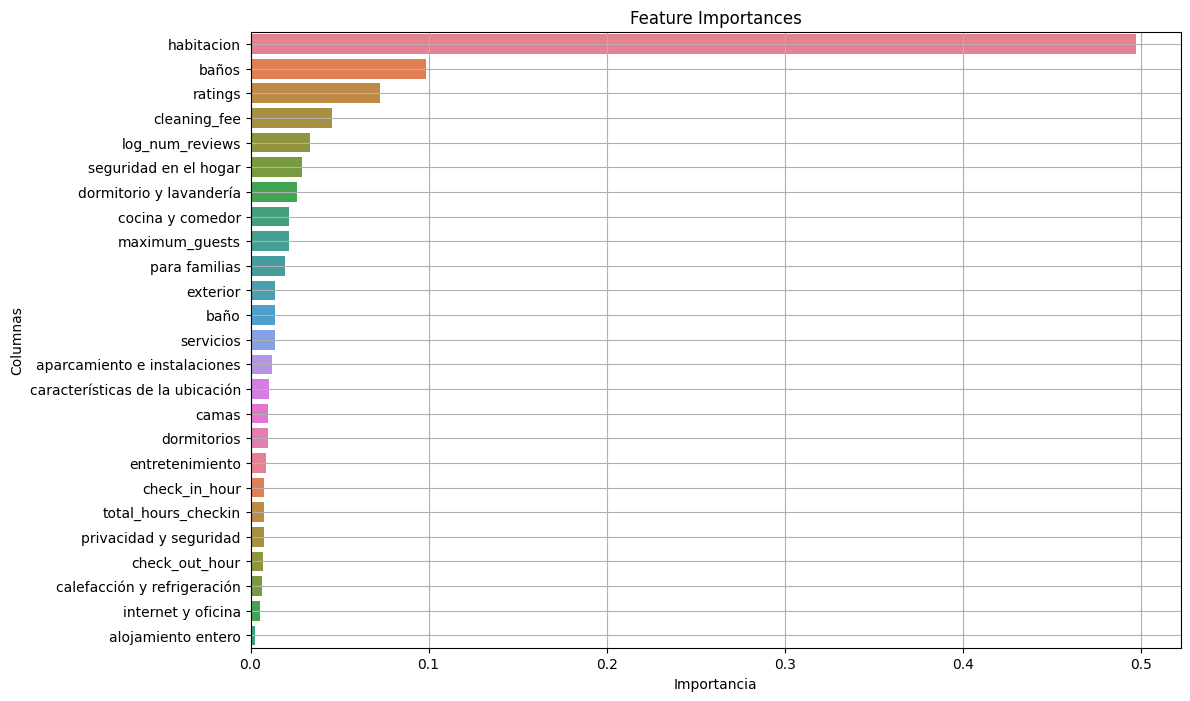

CPU times: total: 1.47 s
Wall time: 4.32 s


In [35]:
%%time

# Feature Importance

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(df.drop(["prices_per_night"], axis = 1), df["prices_per_night"])

# Calculamos Feature Importance
importances = model.feature_importances_

df = pd.DataFrame(data = zip(df.drop(["prices_per_night"], axis = 1).columns, importances),
                               columns = ["Columnas", "Importancia"])

df = df.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df["Importancia"], y = df["Columnas"], palette = sns.color_palette("husl", 17))

plt.grid()
plt.show()